##Austin Bike Ride Sharing Data Analysis


In [1]:
#importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data loading
data=pd.read_csv('../input/austin_bikeshare_trips.csv')
data.head()


,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


* Importing Libraries
* Importing Dataset
* Checking Data table

Data Shape defines the datasets total number of row and columns

In [2]:
data.shape

(649231, 12)

In [3]:
#checking for missing data
data.isnull().sum()

bikeid                  723
checkout_time             0
duration_minutes          0
end_station_id        19842
end_station_name          0
month                 30752
start_station_id      19041
start_station_name        0
start_time                0
subscriber_type        2077
trip_id                   0
year                  30752
dtype: int64

##Demanding Station

In [4]:
start_station=data['start_station_name'].value_counts();

In [5]:
end_station=data['end_station_name'].value_counts();

In [6]:
start_station.shape 

(90,)

In [7]:
end_station.shape

(92,)

In [8]:
end_station

City Hall / Lavaca & 2nd                                33125
2nd & Congress                                          29516
Riverside @ S. Lamar                                    28023
4th & Congress                                          27902
Convention Center / 4th St. @ MetroRail                 26862
5th & Bowie                                             25070
Rainey St @ Cummings                                    22696
Davis at Rainey Street                                  21916
Pfluger Bridge @ W 2nd Street                           18632
Capitol Station / Congress & 11th                       17192
Long Center @ South 1st & Riverside                     17103
Barton Springs @ Kinney Ave                             16597
Barton Springs & Riverside                              16541
Zilker Park                                             15302
South Congress & James                                  14975
Convention Center / 3rd & Trinity                       14565
8th & Co

In [9]:
start_station

Riverside @ S. Lamar                                    28695
City Hall / Lavaca & 2nd                                28535
5th & Bowie                                             26669
2nd & Congress                                          26612
4th & Congress                                          24972
Convention Center / 4th St. @ MetroRail                 24357
Rainey St @ Cummings                                    23468
Davis at Rainey Street                                  22273
Capitol Station / Congress & 11th                       20056
Pfluger Bridge @ W 2nd Street                           19434
Long Center @ South 1st & Riverside                     16285
Barton Springs & Riverside                              16130
Barton Springs @ Kinney Ave                             15816
3rd & West                                              15576
Palmer Auditorium                                       15044
South Congress & James                                  14802
South Co

# Popular Station

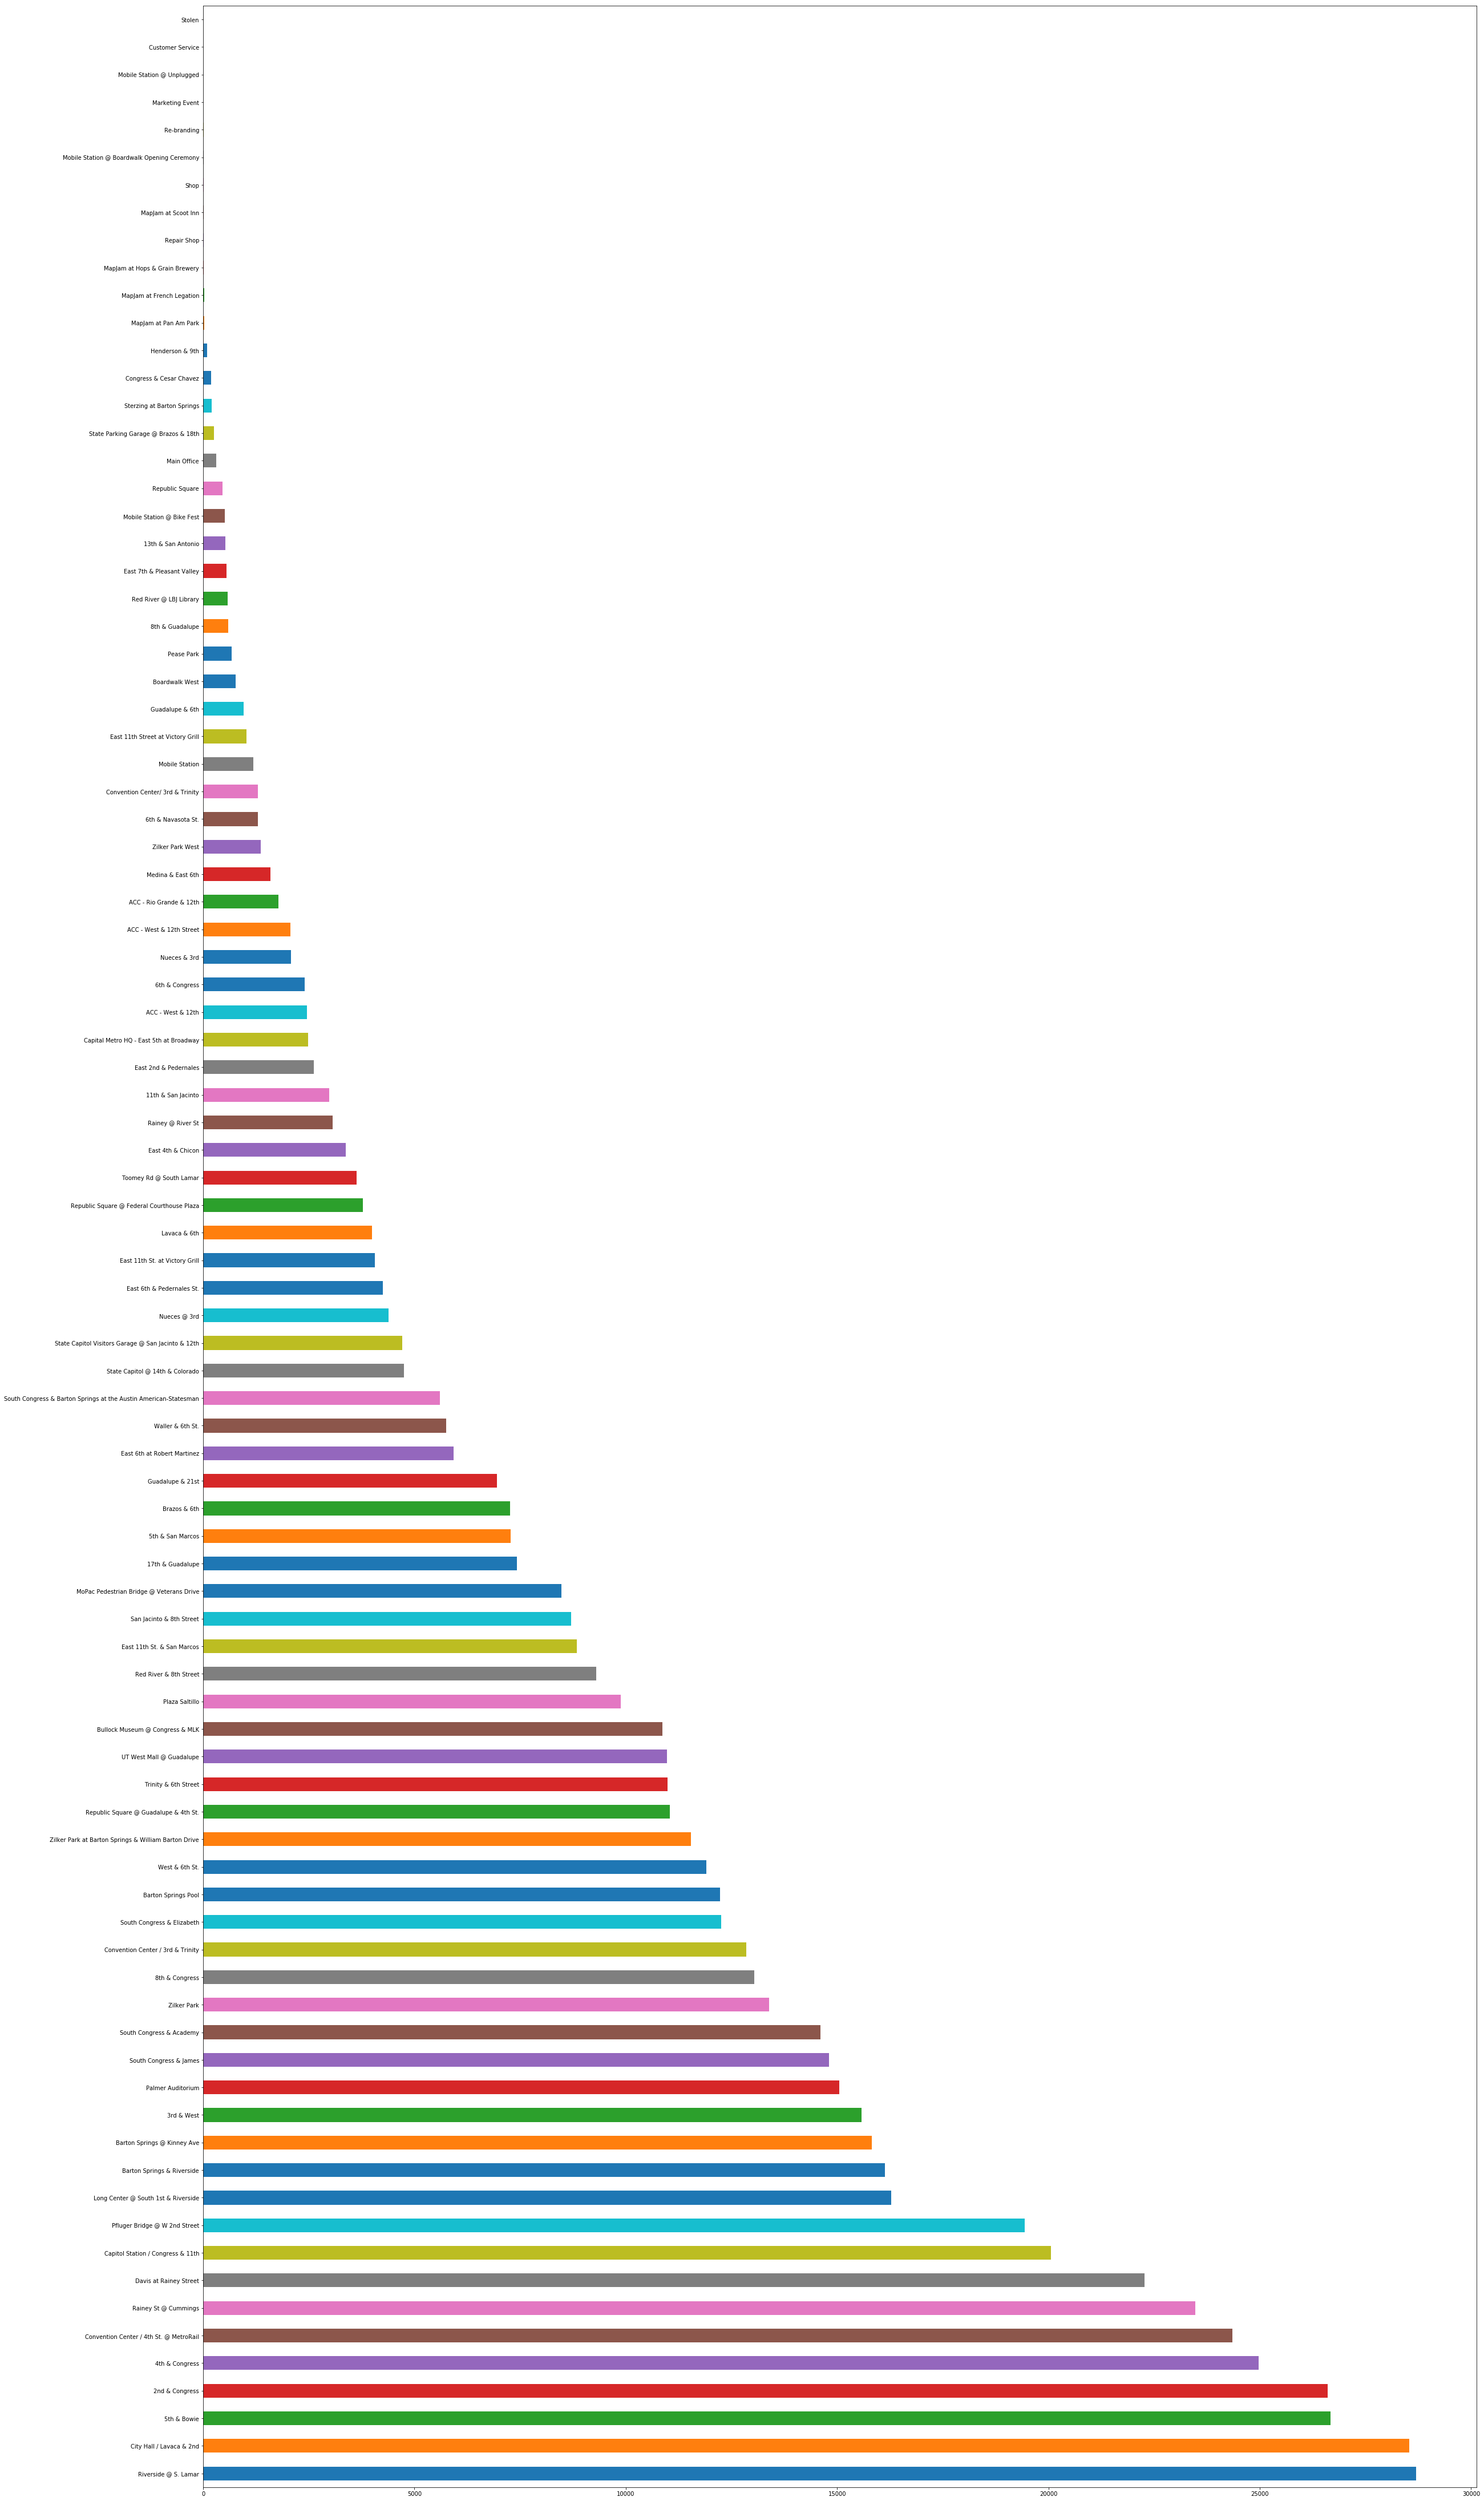

In [10]:
plt.figure(figsize=(40,80))
start_station.plot.barh()
#plt.show()
plt.savefig('demand.png')

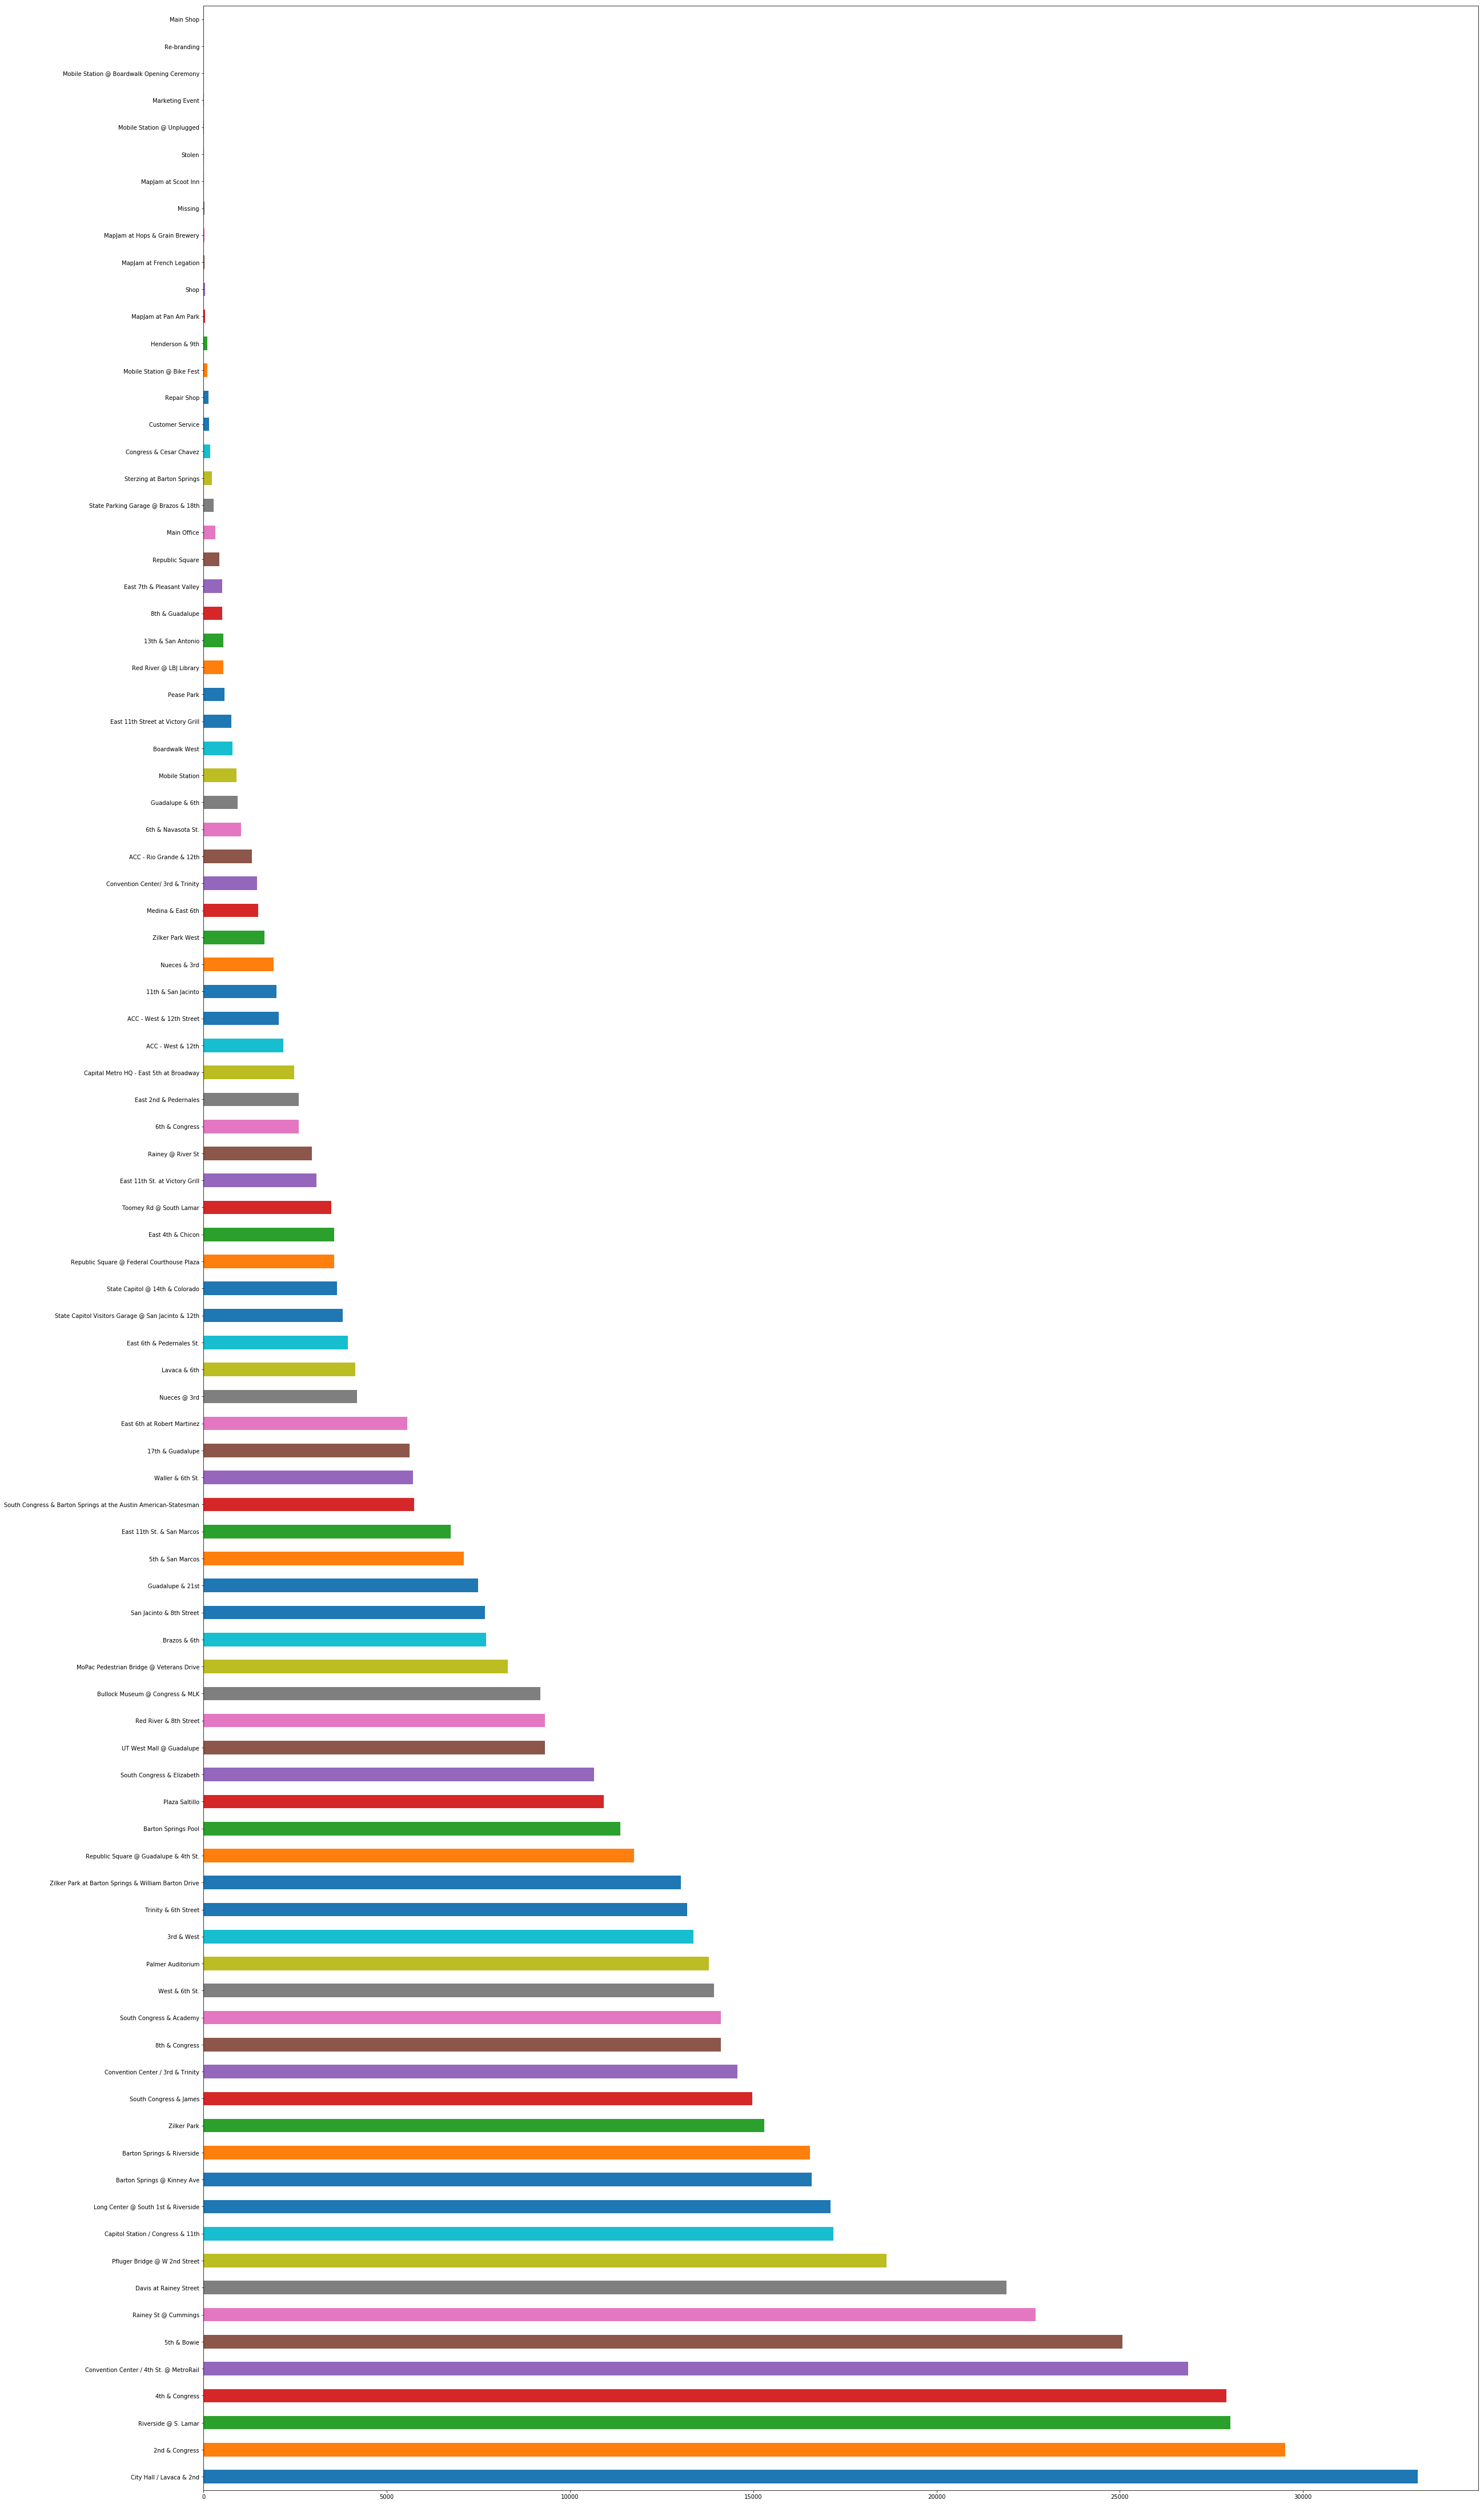

In [11]:
plt.figure(figsize=(40,80))
end_station.plot.barh()
#plt.show()
plt.savefig('demand_2.png')

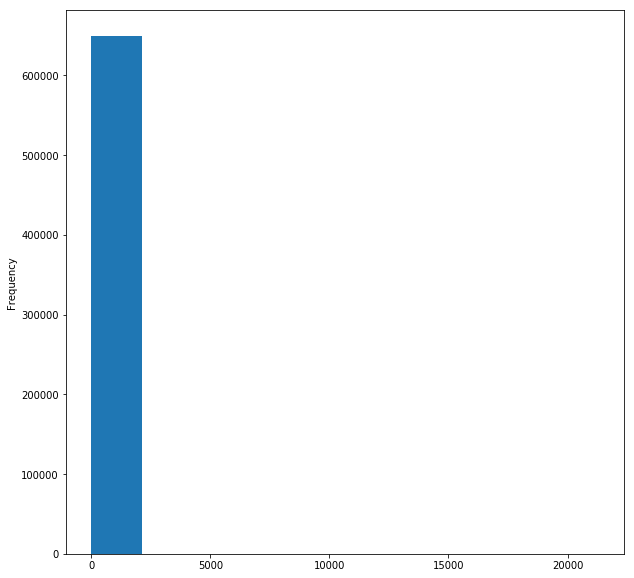

In [12]:
import numpy as np
import seaborn as sns
duration=data['duration_minutes']
plt.figure(figsize=(10,10))
#sns.distplot(duration)

duration.plot(kind='hist')

#plt.xlim((duration.min(),duration.max()))
#plt.xticks(np.arange(duration.min(),duration.max(),5))



In [13]:
np.unique(data['year'])

array([2013., 2014., 2015., ...,   nan,   nan,   nan])

# Yearly total ride

Text(0,0.5,'Ride Count')

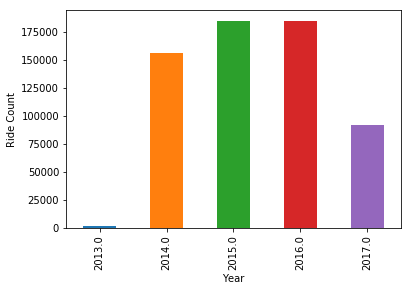

In [14]:
year=data['year'].value_counts()
year.sort_index(inplace=True)
plt.figure()
year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Ride Count')

##Pick Hour Finding

In [15]:
cot=data['checkout_time']
cot.dtype

dtype('O')

In [16]:
cot.describe()

count       649231
unique       65663
top       16:12:00
freq         24707
Name: checkout_time, dtype: object

In [17]:
type(cot)

pandas.core.series.Series

In [18]:
data['checkout_time']=pd.to_datetime(data['checkout_time'])

In [19]:
data['checkout_time']=[time.time() for time in data['checkout_time']]

In [20]:
data['Hour']=data['checkout_time'].apply(lambda x:x.hour)

In [21]:
print(data.head())

   bikeid checkout_time  duration_minutes  end_station_id  \
0     8.0      19:12:00                41          2565.0   
1   141.0      02:06:04                 6          2570.0   
2   578.0      16:28:27                13          2498.0   
3   555.0      15:12:00                80          2712.0   
4    86.0      15:39:13                25          3377.0   

                           end_station_name  month  start_station_id  \
0                      Trinity & 6th Street    3.0            2536.0   
1                  South Congress & Academy   10.0            2494.0   
2   Convention Center / 4th St. @ MetroRail    3.0            2538.0   
3                   Toomey Rd @ South Lamar   11.0            2497.0   
4  MoPac Pedestrian Bridge @ Veterans Drive    4.0            2707.0   

                  start_station_name           start_time  \
0                   Waller & 6th St.  2015-03-19 19:12:00   
1                     2nd & Congress  2016-10-30 02:06:04   
2    Bullock Muse

In [22]:
print(data['Hour'].unique())

[19  2 16 15 12 13 20 22 17  6 10 23 11  8  1  9 18 14  0 21  7  3  4  5]


In [23]:
print(data['Hour'].value_counts())

17    56819
16    56643
13    56564
15    56346
14    55631
12    51667
18    47532
11    42441
19    36778
10    31716
20    27161
9     25862
8     21425
21    21279
22    15830
7     10743
23    10376
0      7583
2      5400
1      5305
6      3332
3      1143
5       931
4       724
Name: Hour, dtype: int64


# Most pick Hour 

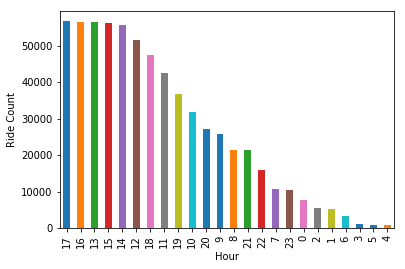

In [24]:
checkout=data['Hour'].value_counts()
plt.figure()
checkout.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Ride Count')
plt.show()


In [25]:
data.head(10)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year,Hour
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0,19
1,141.0,02:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0,2
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0,16
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0,15
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0,15
5,861.0,15:12:00,29,2537.0,West & 6th St.,5.0,2540.0,17th & Guadalupe,2015-05-29 15:12:00,Local30,9900153369,2015.0,15
6,382.0,12:24:16,17,2575.0,Riverside @ S. Lamar,7.0,2567.0,Palmer Auditorium,2016-07-26 12:24:16,Walk Up,11114967,2016.0,12
7,435.0,13:12:00,49,2575.0,Riverside @ S. Lamar,1.0,2575.0,Riverside @ S. Lamar,2015-01-15 13:12:00,Walk Up,9900005413,2015.0,13
8,555.0,13:12:00,19,2571.0,Red River & 8th Street,5.0,2503.0,South Congress & James,2014-05-05 13:12:00,24-Hour Kiosk (Austin B-cycle),9900126917,2014.0,13
9,668.0,12:27:28,20,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,NaN,2575.0,Riverside @ S. Lamar,2017-07-08 12:27:28,Walk Up,15339050,NaN,12


# Monthly Demand

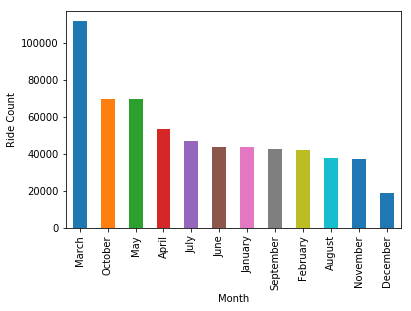

In [26]:
import calendar
month=data['month'].value_counts()
fig, ax = plt.subplots()
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Ride Count')
mn=[calendar.month_name[int(x)] for x in month.index.values.tolist()]
ax.set_xticklabels(mn)
#ax.set_xticklabels(mn, rotation='vertical', fontsize=18)
plt.show()


# Top bike id

951.0    2049
839.0    2047
696.0    2043
387.0    2034
969.0    2028
Name: bikeid, dtype: int64


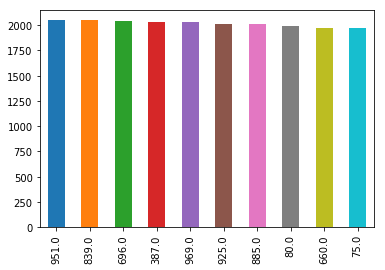

In [27]:
bikeid=data['bikeid'].value_counts()
print(bikeid.head())
top_ten_bikeid=bikeid.head(10)
top_ten_bikeid.plot(kind='bar')